<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Introduction and Motivation: Modeling and methods for scientific computing

## Why are we here?

Cannot solve everything

$$x^5 + 3x^2+ 2x + 3 = 0$$

$$f(x,y,z,t) = 0$$

Problems can be too big...

![Linear Regression](./images/linear_regression.png)

Actually want an answer...

Numerics complement analytical methods.

## Why should I care?

#### The Retirement Problem

$$A = \frac{P}{r} \left((1+r)^n - 1 \right)$$

$P$ is the incremental payment

$r$ is the interest rate per payment period

$n$ is the number of payments

$A$ is the total amount after n payments

Note that these can all be functions of $r$, $n$, and time

CODE DEMO

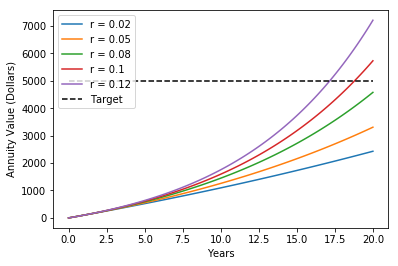

In [4]:
def A(P, r, n):
    return P / r * ((1 + r)**n - 1)

n = numpy.linspace(0, 20, 100)
target = 5000
for r in [0.02, 0.05, 0.08, 0.1, 0.12]:
    plt.plot(n, A(100, r, n))
plt.plot(n, numpy.ones(n.shape) * target, 'k--')
plt.legend(["r = 0.02", "r = 0.05", "r = 0.08", "r = 0.1", "r = 0.12", "Target"], loc=2)
plt.xlabel("Years")
plt.ylabel("Annuity Value (Dollars)")
plt.show()

#### Boat race
Given a river (say a sinusoid) find the total length actually rowed over a given interval

$$f(x) = A \sin x$$

CODE DEMO

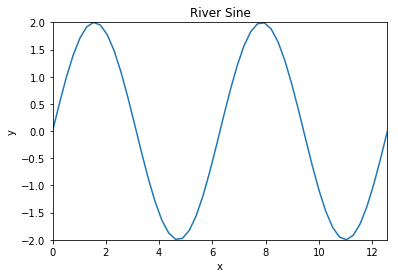

In [5]:
x = numpy.linspace(0, 4 * numpy.pi)
plt.plot(x, 2.0 * numpy.sin(x))
plt.title("River Sine")
plt.xlabel("x")
plt.ylabel("y")
plt.axis([0, 4*numpy.pi, -2, 2])
plt.show()

We need to calculate the function $f(x)$'s arc-length from $[0, 4 \pi]$

$$L = \int_0^{4 \pi} \sqrt{1 + |f'(x)|^2} dx$$

In general need numerical quadrature.

#### Non-Linear population growth

Lotka-Volterra Predator-Prey model

$$\frac{d R}{dt} = R \cdot (a - b \cdot F)$$
$$\frac{d F}{dt} = F \cdot (c \cdot R + d)$$

 - Where are the steady states?
 - How do we solve the initial value problem?
 - How do we understand the non-linear dynamics?
 - How do we evaluate whether this is a good model?

#### Interpolation and Data Fitting

Finding trends in real data represented without a closed form (analytical form).

Sunspot counts

CODE DEMO

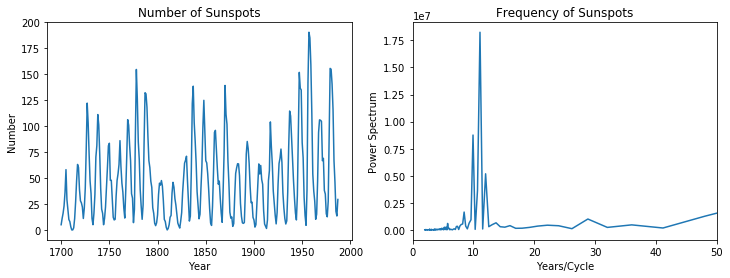

In [34]:
data = numpy.loadtxt("./data/sunspot.dat")

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.plot(data[:, 0], data[:, 1])
axes.set_xlabel("Year")
axes.set_ylabel("Number")
axes.set_title("Number of Sunspots")

axes = fig.add_subplot(1, 2, 2)
N = int(data.shape[0] / 2)
period = 1.0 / numpy.fft.fftfreq(data.shape[0])[1:N]
sunspot_freq = numpy.fft.fft(data[:, 1])[1:N]
freq = numpy.fft.fftfreq(data.shape[0])[1:N]
axes.plot(period, numpy.abs(sunspot_freq)**2)
axes.set_xlabel("Years/Cycle")
axes.set_ylabel("Power Spectrum")
axes.set_title("Frequency of Sunspots")
axes.set_xlim((0, 50))

plt.show()

## Tools

### Python

Why python?

#### C, C++, Fortran

##### Pros:
 - Performance and legacy computing codes available

##### Cons:
 - Syntax not optimized for casual programming
 - No interactive facilities
 - Difficult visualization, text processing, etc.
 

#### IDL, Matlab, Mathematica, etc.

##### Pros:
 - Interactive with easy visualization tools
 - Extensive scientific and engineering libraries available

##### Cons:
 - Costly and proprietary
 - Unpleasant for large-scale computing and non-mathematical tasks

#### Python
##### Pros:
 - Python is free (BSD-like license) and highly portable (Windows, Mac OS X, Linux, etc.)
 - Interactive interpreter
 - Readability
 - Simple
 - Extensive documentation
 - Memory management is (mostly) transparent
 - Clean and object-oriented
 - Built-in types

##### Pros:
- Comprehensive standard library
 - Well-established 3rd-party packages (NumPy, SciPy, matplotlib, etc.)
 - Easily wraps existing legacy code in C, C++ and Fortran
 - Python mastery is marketable
 - Scalability
   - Interactive experimentation
   - Code can be one-line scripts or million-line projects
   - Used by novices and full-time professionals alike

##### Cons:
 - Can be slow
 - Packaging system is a bit crufty
 - Too many Monty Python jokes (not really a con)

### Version Control via `git`

`git` is version control system allowing a user to take "snapshots" of data.  These snapshots can then be compared, combined or recalled as needed.

Why version control (or `git`)?
 - Nearly ubiquitous in modern software engineering and hence an essential skill
 - Can save you from yourself
 - Steep learning curve so expose yourself often for maximal success
 
[Learn more!](https://git-scm.com/)

### Peer Review

**Why?**
In this class reviewing your peer's work can lead to
 - Better understanding of a problem
 - See alternative solutions to the same problem
 - Learn how to read other people's code
 - Hopefully learn some tips about your own coding style
 - Another skill 

## Infrastructure

### Jupyter Notebooks

The notebook environment gives us a convenient means for working with code while annotating it.  We will only cover the key concepts here and hope that you will explore on your own the environments.

#### Toolbar

 - Notebooks are modal, they have an edit mode (editing cells) and command mode.
 - Highly recommend taking the tour and checking out the help menu 

#### Content types
   - Markdown
   - LaTeX $x^2$
   - Python
   - NumPy, SciPy, and other packages

#### Obtaining the Notebooks

All notebooks are found on [github](http://github.com/mandli/intro-numerical-methods).

Highly recommend obtaining a github account if you do not already have one.  Will allow you start to become comfortable with `git`.

**Clone** the repository

`$> git clone git://github.com/mandli/intro-numerical-methods`

**Pull** in new changes

`$> git pull`

**Push** new changes (you do not have permission to do this

`$> git push`

Also note that you can watch what changes were made and submit **issues** to the github project page if you find mistakes (PLEASE DO THIS!).

### Installation

A few options
 1. Install on your own machine
 2. Use a cloud service

#### Your own machine

The easiest way to install all the components you will need for the class is to use Continuum Analytics' [Anaconda](http://continuum.io/downloads) distribution.  We will be using python 2.7.x for all in class demos and homework so I strongly suggest you do not get the Python 3.4 version.

Alternatives to using Anaconda also exist in the form of Enthought's [Canopy](https://www.enthought.com/products/canopy/) distribution which provides all the tools you will need as well along with an IDE (development environment).

#### The "cloud"

Instead of running things locally on your machine there are a number of cloud services that you are welcome to use in order to get everything running easily.
 1. Vocareum - Homework, peer review, and exams will take place on this platform and will be made available.
 1. JupyterHub - Use CUIT's supported [Jupyter server](https://jupyterhub.cuit.columbia.edu/hub/login) and login via your uni.
 1. Sage-Math-Cloud - Create an account on [Sage-Math-Cloud](https://cloud.sagemath.com) and interact with python via the provided terminal or Ipython notebook inteface.
 1. Wakari - Continuum also has a free cloud service called [Wakari](https://wakari.io) that you can sign up for which provides an Anaconda installation along with similar tools to Sage-Math-Cloud.